<a href="https://colab.research.google.com/github/AbhilashG97/Watermelon-Snowball/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will contain a simple exercise on a NLP topic - **Sentiment Analysis** 

We will begin by importing relavent libraries

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string 
import nltk
import io
import re

Now, the test and train data is uploaded to Google Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


After the data is uploaded to Google Colab, it is stored into a pandas DataFrame

In [3]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

print(train.head())
print('\n\n' + str(test.head()))

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In the above data, the value which is labeled as 0 is **not** hateful whereas the value which is labeled as 1 is hateful.

## Preprocessing the Data

After the data is loaded to a pandas DataFrame, the data will undergo preprocessing to clean the data.

In [4]:
combined_data = train.append(test, ignore_index=True)
combined_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


To normalize the data, a simple function is written that removes the tokens specified in regex

In [0]:
def clean_text(input, regex):
  words_to_be_removed = re.findall(regex, input)
  
  for i in words_to_be_removed:
    input = re.sub(i, "", input)
    
  return input


All usernames are now removed from the DataFrame

In [6]:
combined_data['cleaned_tweets'] = np.vectorize(clean_text)(combined_data['tweet'], "@[\w]*")
combined_data.head()

,id,label,tweet,cleaned_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Here all special symbols and digits are removed.

In [7]:
combined_data['cleaned_tweets'].str.replace("[^a-zA-Z#]", " ")

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can t use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
5              huge fan fare and big talking before the...
6                         camping tomorrow        danny   
7        the next school year is the year for exams    ...
8        we won    love the land    #allin #cavs #champ...
9                    welcome here    i m   it s so #gr    
10            #ireland consumer price index  mom  climb...
11       we are so selfish  #orlando #standwithorlando ...
12       i get to see my daddy today     #  days #getti...
13        #cnn calls #michigan middle school  build the...
14       no comment   in #australia   #opkillingbay #se...
15       ouch   junior is angry    #got  #junior #yugyo...
16       i am thankful for having a paner  #thankful #p.

Now, stop words will be removed from the DataFrame and ```cleaned_tweets``` column is also tokenized.

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tokenized_doc = combined_data['cleaned_tweets'].apply(lambda x: x.split())
tokenized_doc

tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

combined_data.cleaned_tweets = tokenized_doc
combined_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,label,tweet,cleaned_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,"[thanks, #lyft, credit, can't, use, cause, off..."
2,3,0.0,bihday your majesty,"[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,"[#model, love, u, take, u, time, urð±!!!, ð..."
4,5,0.0,factsguide: society now #motivation,"[factsguide:, society, #motivation]"


After the data is tokenized, stemming is performed to further strip the suffixes

In [9]:
from nltk.stem import LancasterStemmer 

stemmer = LancasterStemmer()

combined_data.cleaned_tweets = combined_data['cleaned_tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
combined_data.head()

,id,label,tweet,cleaned_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,"[fath, dysfunct, self, drag, kid, dysfunction...."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,"[thank, #lyft, credit, can't, us, caus, off, w..."
2,3,0.0,bihday your majesty,"[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,"[#model, lov, u, tak, u, tim, urð±!!!, ðð..."
4,5,0.0,factsguide: society now #motivation,"[factsguide:, socy, #motivation]"


Now all the words will be joined together to form a single text document

In [10]:
text = []

for i in range(len(combined_data['cleaned_tweets'])):
  temp = " ".join(combined_data['cleaned_tweets'][i])
  text.append(temp)
  
combined_data['cleaned_tweets'] = text
combined_data.head()

,id,label,tweet,cleaned_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,fath dysfunct self drag kid dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't us caus off wheelchai...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model lov u tak u tim urð±!!! ðððð...
4,5,0.0,factsguide: society now #motivation,factsguide: socy #motivation


## Wordclouds

Here, the most frequent words will be represented using a word cloud. First, all the words from the tweets are displayed. Then wordclouds for hateful and non-hateful tweets will be plotted.

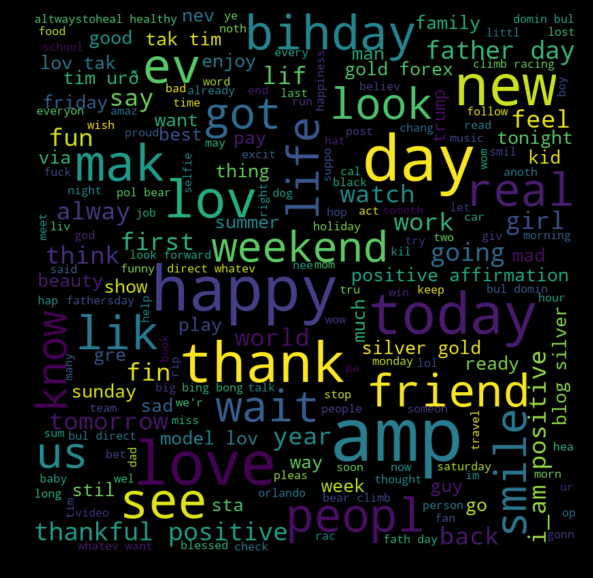

In [11]:
from wordcloud import WordCloud

all_words = " ".join(text for text in combined_data['cleaned_tweets'])
wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10), facecolor='k')
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The above Wordcloud represents all the data of present in DataFrame. However, in order to get a better visualization of the both the hateful and non-hateful tweets, a separate WordCloud will be plotted.

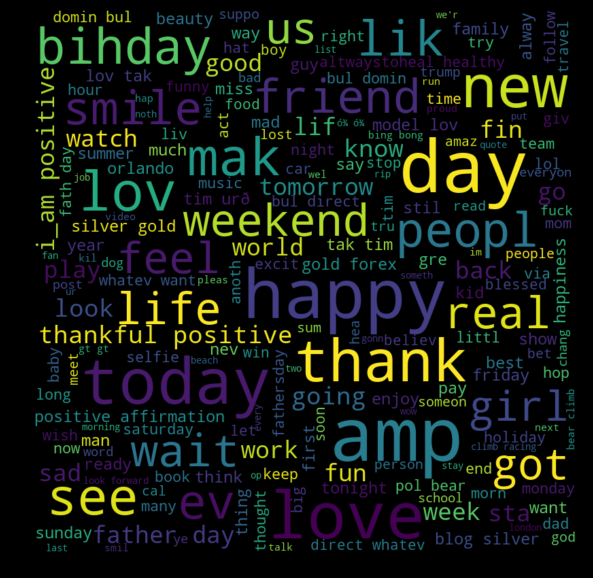

In [12]:
data_filter = combined_data['label'].isin(['0'])

normal_data = combined_data[data_filter]

normal_words = ' '.join([text for text in normal_data['cleaned_tweets']])

normal_wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(20, 10), facecolor='k')
plt.tight_layout(pad=0)
plt.imshow(normal_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now, the WordCloud for hateful tweets is plotted. 

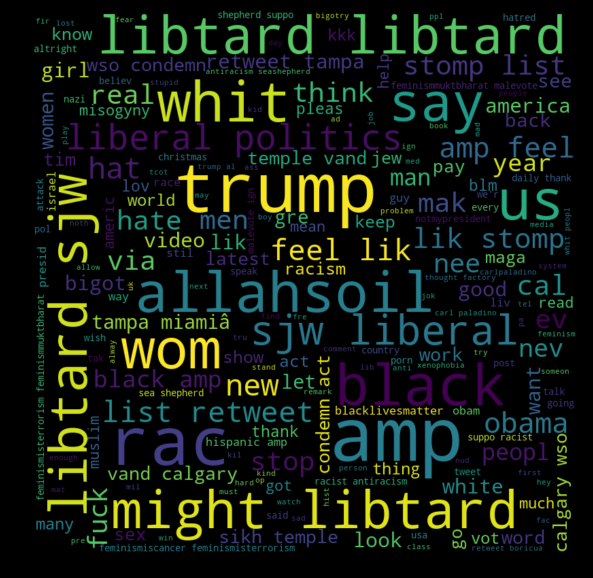

In [13]:
data_filter = combined_data['label'].isin([('1')])

data = combined_data[data_filter]

hateful_text = ' '.join([text for text in data['cleaned_tweets']])

hateful_wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(hateful_text)

plt.figure(figsize=(20, 10), facecolor = 'k')
plt.tight_layout(pad=0)
plt.imshow(hateful_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now, the Hashtags present in the data will be analyzed. 

In order to accomplish this task, all the hastags need to be extracted. For this a simple python function is written

In [0]:
def get_hashtags(input_list):
  hashtag_list = []
  for i in input_list:
    hashtags = re.findall(r'#[\w]+', i)
    
    hashtag_list.extend(hashtags)
    
  return hashtag_list

After this, positive and negative hashtags need to be separated so that they can be analyzed.

In [0]:
normal_text_list = combined_data['cleaned_tweets'][combined_data['label'] == 0]
positive_hashtag_list = get_hashtags(normal_text_list)

hateful_text_list = combined_data['cleaned_tweets'][combined_data['label'] == 1]
negative_hashtag_list = get_hashtags(hateful_text_list)

Now, the data for both the hashtags has been extracted and stored in a DataFrame. To better visualize the data, a histogram will be plotted with the given data.  Two histograms will be plotted, one for the positive hashtags and the other negative hashtags. 

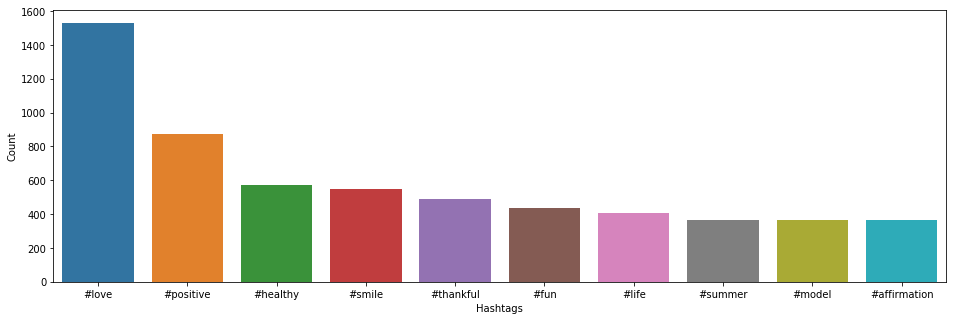

In [16]:
positive_hashtags = nltk.FreqDist(positive_hashtag_list)
# positive_hashtags is a dictionary which contains data in key-value pairs 

positive_hashtags_df = pd.DataFrame ({
    'hashtag_name': list(positive_hashtags.keys()),
    'hashtag_count': list(positive_hashtags.values()) 
    })

positive_hashtags_df = positive_hashtags_df.nlargest(n=10, columns='hashtag_count').reset_index(drop=True)
positive_hashtags_df.head()

plt.figure(figsize=(16, 5))
ax = sns.barplot(data=positive_hashtags_df, x='hashtag_name', y='hashtag_count')
ax.set(ylabel='Count', xlabel='Hashtags')
plt.show()

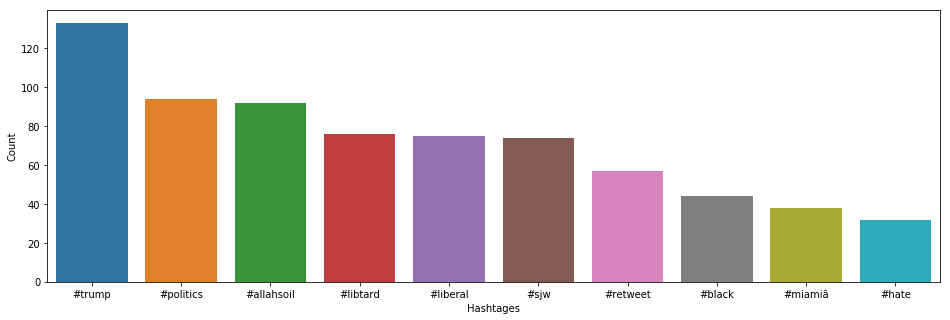

In [17]:
negative_hashtags = nltk.FreqDist(negative_hashtag_list)

negative_hashtags_df = pd.DataFrame({
    'hashtag_name' : list(negative_hashtags.keys()),
    'hashtag_count' : list(negative_hashtags.values())
})

negative_hashtags_df = negative_hashtags_df.nlargest(n=10, columns='hashtag_count').reset_index(drop=True)

plt.figure(figsize=(16, 5))
ax = sns.barplot(data=negative_hashtags_df, x='hashtag_name', y='hashtag_count')
ax.set(xlabel='Hashtages', ylabel='Count')
plt.show()

Histograms for both postive and negative hashtags have been plotted above. 
The next task will to be extract features from the cleaned data set.

## Extracting Features form the Normalized Data

Features can be extracted from a text in a number of ways. Some of the commonly used techniques are -

1. Bag-of-Words Feature
1. TF-IDF
1. Word Embeddings


### Bag-of-Words Features

This is a method where text data can be represented as numerical data. 

Here **N** tokens are considered from a corpus **C** of **D** Documents (d1, d2, ...... dD).  The **N** tokens will form a list.

Also, a Matrix M of size D x N is used to represent this mathematically, where each row in Matrix M contains the frequency of tokens in document **D(i)**

A ```Bag-of-Words features (BoW)``` can be created using the CountVectorizer from the sklearn library.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

bow = bow_vectorizer.fit_transform(combined_data['cleaned_tweets'])

print(bow.shape)

(49159, 1000)


### TF-IDF 

This is another method used for feature extraction in NLP. 

1. TF = (Number of times term t appears in a document)/(Number of terms in the document)
1. IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
1. TF-IDF = TF*IDF




In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(combined_data['cleaned_tweets'])
print(tfidf.shape)

(49159, 1000)


## Model Building

Now the model for the two feature set will be built.  Logistic Regression will be used to perform the classification.

### Bag of Words Features

In [20]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

X_train_bow, X_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, train['label'], random_state = 42, test_size = 0.3)

In [22]:
lreg = LogisticRegression()

lreg.fit(X_train_bow , y_train_bow)

prediction = lreg.predict_proba(X_valid_bow)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(y_valid_bow, prediction_int)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5275459098497496

Now, the values will be predicted and stored in a ```.csv``` file.

In [0]:
test_prediction = lreg.predict_proba(test_bow)
test_prediction_int = test_prediction[:, 1]
test_prediction_int = test_prediction_int.astype(np.int)

test['label'] = test_prediction_int

final_result = test[['id', 'label']]
final_result.to_csv('result_lreg_bow.csv', index=False)

### TF-IDF Features

Here **TF-IDF** features will be used to classify the data.

In [24]:
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[:31962, :]

xtrain_tfidf = train_tfidf[y_train_bow.index]
xvalid_tfidf = train_tfidf[y_valid_bow.index]

print(xvalid_tfidf.shape)

lreg.fit(xtrain_tfidf, y_train_bow)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(y_valid_bow, prediction_int)

(9589, 1000)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5350877192982456

The F1 score for the **TF-IDF** feature vector is 0.53508 which is a bit more than the Bag of Words model.  

Thus, **TF-IDF** provides better resultes when compared to **Bag of Words** features.